# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [146]:
import pandas as pd
import seaborn as sns

In [115]:
df = pd.read_csv("./customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [117]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [118]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [119]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [120]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [121]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [122]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [123]:
cat_cols=df.select_dtypes(include='O')
for col in cat_cols.columns:
    print(df[col].value_counts())
    print('-------'*10)
    

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
----------------------------------------------------------------------
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
----------------------------------------------------------------------
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64
----------------------------------------------------------------------
booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64
---------------------

In [124]:
df1=pd.get_dummies(df,columns=["sales_channel","trip_type"],drop_first=True,dtype='int')
df1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["route"]=le.fit_transform(df1["route"])
df1["booking_origin"]=le.fit_transform(df1["booking_origin"])
df1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,61,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,0,36,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,61,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,0,36,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,720,4,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,720,4,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,720,4,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,720,4,1,0,1,5.62,0,0,0,1


## EDA

In [126]:
df1.corr()["booking_complete"].sort_values(ascending=False)

booking_complete         1.000000
booking_origin           0.130804
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
trip_type_RoundTrip      0.028226
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
route                   -0.008488
purchase_lead           -0.022131
trip_type_OneWay        -0.024240
sales_channel_Mobile    -0.041060
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64

<Axes: xlabel='flight_duration', ylabel='flight_day'>

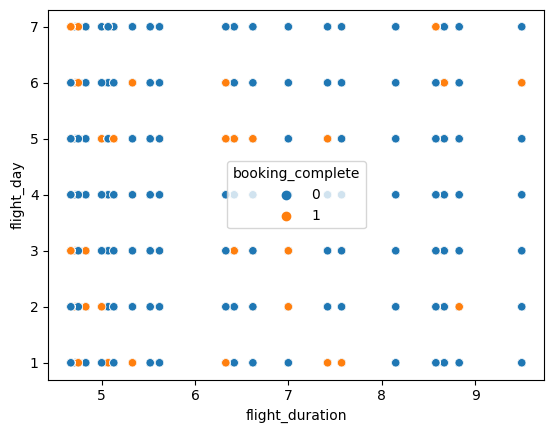

In [149]:
sns.scatterplot(x="flight_duration",y="flight_day",hue="booking_complete",data=df1)

In [169]:
loc=df.groupby("booking_origin")["booking_complete"].sum()
loc=loc.to_frame().reset_index()
loc_sorted = loc.sort_values(by="booking_complete", ascending=False)
loc_sorted

,booking_origin,booking_complete
51,Malaysia,2468
4,Australia,900
17,China,694
37,Indonesia,615
43,Japan,478
...,...,...
63,Norfolk Island,0
67,Panama,0
68,Papua New Guinea,0
69,Paraguay,0


C:\Users\varun\AppData\Local\Temp\ipykernel_19908\779094545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["num_passengers"])


<Axes: xlabel='num_passengers', ylabel='Density'>

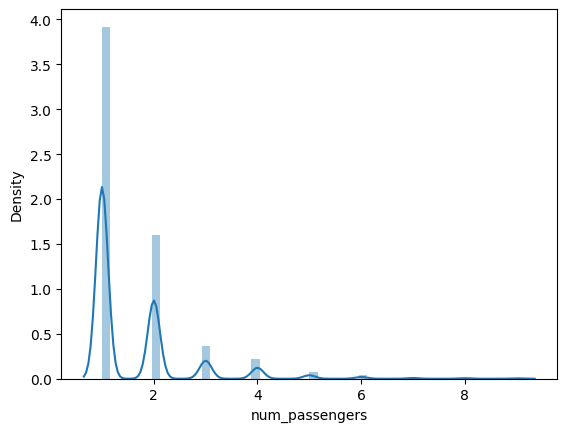

In [171]:
sns.distplot(df1["num_passengers"])

<Axes: >

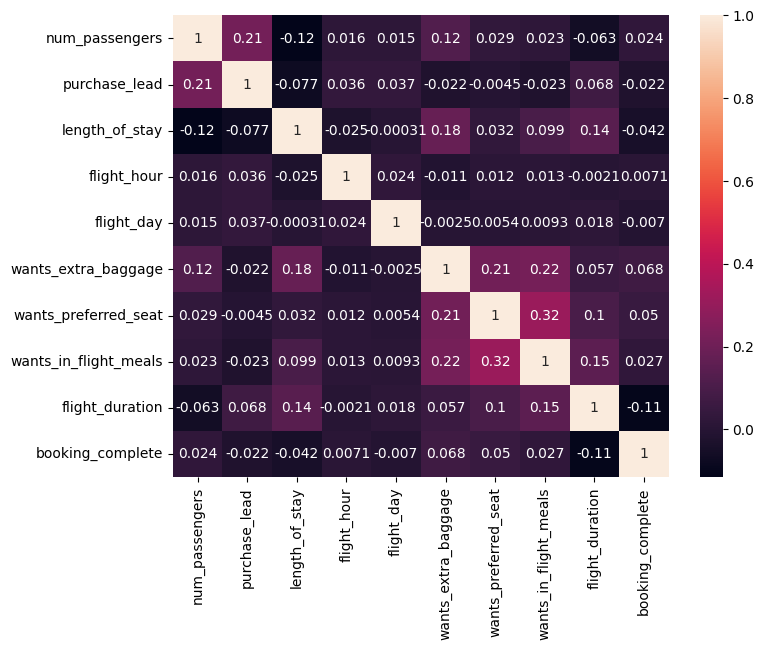

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# X and Y Declaration

In [127]:
x=df1.drop(columns=["booking_complete","flight_hour","flight_day","route","num_passengers","purchase_lead"],axis=1)
y=df1["booking_complete"]
x

,length_of_stay,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,19,61,1,0,0,5.52,0,0,1
1,20,61,0,0,0,5.52,0,0,1
2,22,36,1,1,0,5.52,0,0,1
3,31,61,0,0,1,5.52,0,0,1
4,22,36,1,0,1,5.52,0,0,1
...,...,...,...,...,...,...,...,...,...
49995,6,4,1,0,1,5.62,0,0,1
49996,6,4,0,0,0,5.62,0,0,1
49997,6,4,0,0,1,5.62,0,0,1
49998,6,4,1,0,1,5.62,0,0,1


In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((40000, 9), (10000, 9))

In [129]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
from sklearn.metrics import accuracy_score
pred=model.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,model.predict(x_train)))
print("Testing Accuracy",accuracy_score(y_test,pred))

Training Accuracy 0.89975
Testing Accuracy 0.8334


### XBG Model

In [131]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
x_pred=xg.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,xg.predict(x_train)))
print("Testing Accuracy",accuracy_score(y_test,x_pred))

Training Accuracy 0.859275
Testing Accuracy 0.8512


## Parameter Tuning

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}


In [143]:
grid_search = RandomizedSearchCV(xg, param_distributions=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='accuracy')

In [144]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.01}
Best Accuracy: 0.8505750000000001


In [145]:
accuracy_score(y_test,grid_search.predict(x_test))

0.8499

## Cross Validation Score


In [173]:
from sklearn.model_selection import cross_val_score
cross_val_score(xg,x,y,cv=5)

array([0.8487, 0.7813, 0.6536, 0.3822, 0.7529])